# Learning graph from data

In [1]:
## import module
from CGmodelselection.graph import get_graph_from_data

**Specify the data to be used**

Specify filename an optionally columns that shall not be loaded in the variable *drop*.

In [2]:
## chose one dataset here (or enter your own), list columns not to be loaded in variable <drop>
#filename = "unittest_data/australian-crabs.csv"
#drop =['index']

filename = "datasets/iris.csv"
drop = []

#filename = "datasets/titanic.csv"
#drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']

Disable autoscrolling for outputs.

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**Learn the (weighted) graph**

Filename: datasets/iris.csv
Using a dataset with 150 samples, 1 discrete and 4 continuous variables.
Discrete Variables: ['species']
Continuous Variables: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Solving problem.. Done.


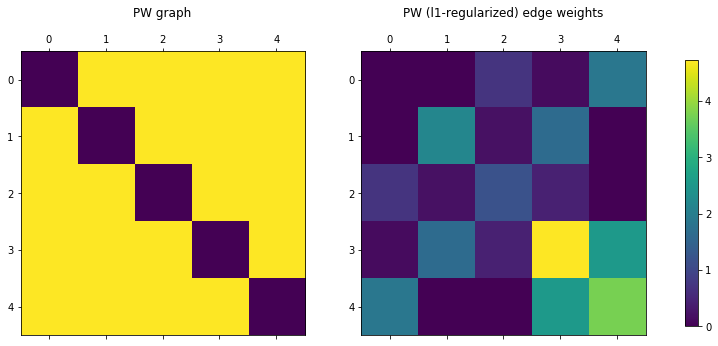

Legend:
0 - species
1 - sepal_length
2 - sepal_width
3 - petal_length
4 - petal_width


In [13]:
## parameters for graph estimation
standardize = True # standardize data before learning (recommended)
kS = 2 # trade-off parameter for l1-regularization term
model = 'PW' # choose from 'PW' (pairwise model) and 'CLZ' (CLZ model with triple interactions)
graphthreshold = 0 #1e-1 # threshold for graph

## get matrix of group-norms (grpnormmat), graph (graph), and legend for row-/column names (dictionary dlegend)
grpnormmat, graph, dlegend = get_graph_from_data(filename, drop = drop, model = model,
                                                 graphthreshold = graphthreshold, standardize = standardize, kS = kS)

In [35]:
import pandas as pd
import numpy as np
dlegend.values()

dict_values(['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [37]:
p
df

,species,sepal_length,sepal_width,petal_length,petal_width
species,0.000000,0.000083,0.714929,0.140795,1.866430
sepal_length,0.000083,0.000000,0.205487,1.658382,0.000093
sepal_width,0.714929,0.205487,0.000000,0.429114,0.000041
petal_length,0.140795,1.658382,0.429114,0.000000,2.531498
petal_width,1.866430,0.000093,0.000041,2.531498,0.000000


**We might also want to rank the edges in terms of their respective edge weights (i.e., their corresponding group-norms).**

In [5]:
from CGmodelselection.graph import order_edges_by_weight

all_ordered_edges = order_edges_by_weight(grpnormmat, disp = True, graphthreshold = graphthreshold)


Edge	Edgeweight
4-3	2.53
4-0	1.87
3-1	1.66
2-0	0.71
3-2	0.43
2-1	0.21
3-0	0.14


In [6]:
# print all edges
all_ordered_edges

[(2.5314976404430749, (4, 3)),
 (1.8664300488089607, (4, 0)),
 (1.6583821755610513, (3, 1)),
 (0.71492935822484405, (2, 0)),
 (0.42911407480255193, (3, 2)),
 (0.20548692274983427, (2, 1)),
 (0.14079502009335923, (3, 0)),
 (9.344948542119977e-05, (4, 1)),
 (8.3337406818727894e-05, (1, 0)),
 (4.098555365297215e-05, (4, 2))]